In [36]:
#Filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [37]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [39]:
#Reading the data set
df = pd.read_csv("/content/Unemployment in India (1).csv")

In [40]:
#Seeing the first five rows
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [41]:
df.tail()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis


In [42]:
df.shape


(768, 7)

In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [44]:
#Checking for null percentage

round(df.isnull().sum()/df.shape[0]*100,2)

Region                                      3.65
 Date                                       3.65
 Frequency                                  3.65
 Estimated Unemployment Rate (%)            3.65
 Estimated Employed                         3.65
 Estimated Labour Participation Rate (%)    3.65
Area                                        3.65
dtype: float64

In [45]:
# Delecting the null rows

df.dropna(inplace = True)

df.shape

(740, 7)

In [46]:
#checking for null percentage

df.isnull().sum()/df.shape[0]

Region                                      0.0
 Date                                       0.0
 Frequency                                  0.0
 Estimated Unemployment Rate (%)            0.0
 Estimated Employed                         0.0
 Estimated Labour Participation Rate (%)    0.0
Area                                        0.0
dtype: float64

In [47]:
# We shall rename the columns for easier access
df = df.rename(columns={' Date' : 'Date',' Frequency': 'Frequency' ,' Estimated Unemployment Rate (%)' : 'Est_Unemp_Rate', ' Estimated Employed' : 'Est_Emp_Rate',
                          ' Estimated Labour Participation Rate (%)' : 'Est_Labour_Rate'}).reset_index(drop = True)


# Rounding estimated employed column for a better visualizing

df['Est_Emp_Rate'] = round((df['Est_Emp_Rate']/1000000),2)

df.head()

,Region,Date,Frequency,Est_Unemp_Rate,Est_Emp_Rate,Est_Labour_Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,12.00,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11.76,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12.09,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12.29,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12.26,44.68,Rural


In [48]:
# Changing the dtype of 'Date' column

df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Region           740 non-null    object        
 1   Date             740 non-null    datetime64[ns]
 2   Frequency        740 non-null    object        
 3   Est_Unemp_Rate   740 non-null    float64       
 4   Est_Emp_Rate     740 non-null    float64       
 5   Est_Labour_Rate  740 non-null    float64       
 6   Area             740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 40.6+ KB


In [49]:
#checking if there are no duplicate rows in the data set

df.duplicated().sum()


0

In [50]:
# Important to note that there is a typo in the 'Frequency' column

df.Frequency.value_counts()

Frequency
Monthly     381
 Monthly    359
Name: count, dtype: int64

In [51]:
df.columns


Index(['Region', 'Date', 'Frequency', 'Est_Unemp_Rate', 'Est_Emp_Rate',
       'Est_Labour_Rate', 'Area'],
      dtype='object')

In [52]:
df = df.drop(['Frequency'],axis = 1)

df.shape

(740, 6)

In [53]:
#We shall create a new column for year and month to analyse the between 2019 and 2020

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.head()

,Region,Date,Est_Unemp_Rate,Est_Emp_Rate,Est_Labour_Rate,Area,Year,Month
0,Andhra Pradesh,2019-05-31,3.65,12.00,43.24,Rural,2019,5
1,Andhra Pradesh,2019-06-30,3.05,11.76,42.05,Rural,2019,6
2,Andhra Pradesh,2019-07-31,3.75,12.09,43.50,Rural,2019,7
3,Andhra Pradesh,2019-08-31,3.32,12.29,43.97,Rural,2019,8
4,Andhra Pradesh,2019-09-30,5.17,12.26,44.68,Rural,2019,9


In [54]:
#Analysing the Area column

df.Area.value_counts(normalize = True)*100

Area
Urban    51.486486
Rural    48.513514
Name: proportion, dtype: float64

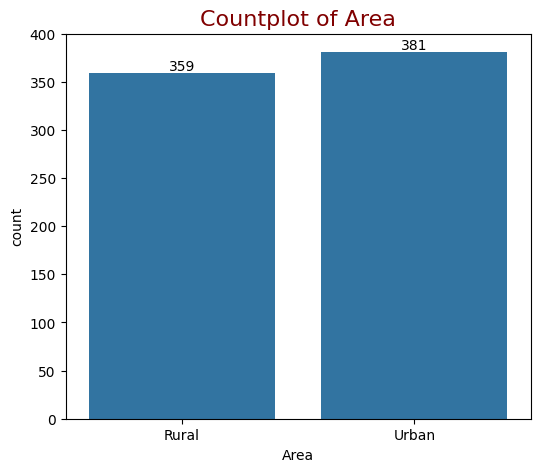

In [55]:
plt.figure(figsize = [6,5])
ax = sns.countplot(data = df, x = 'Area')

plt.title("Countplot of Area", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Maroon'})
for x in ax.containers:
        ax.bar_label(x,rotation=0)

plt.show()

In [56]:
#Analyzing the Region column
df.Region.value_counts()


Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

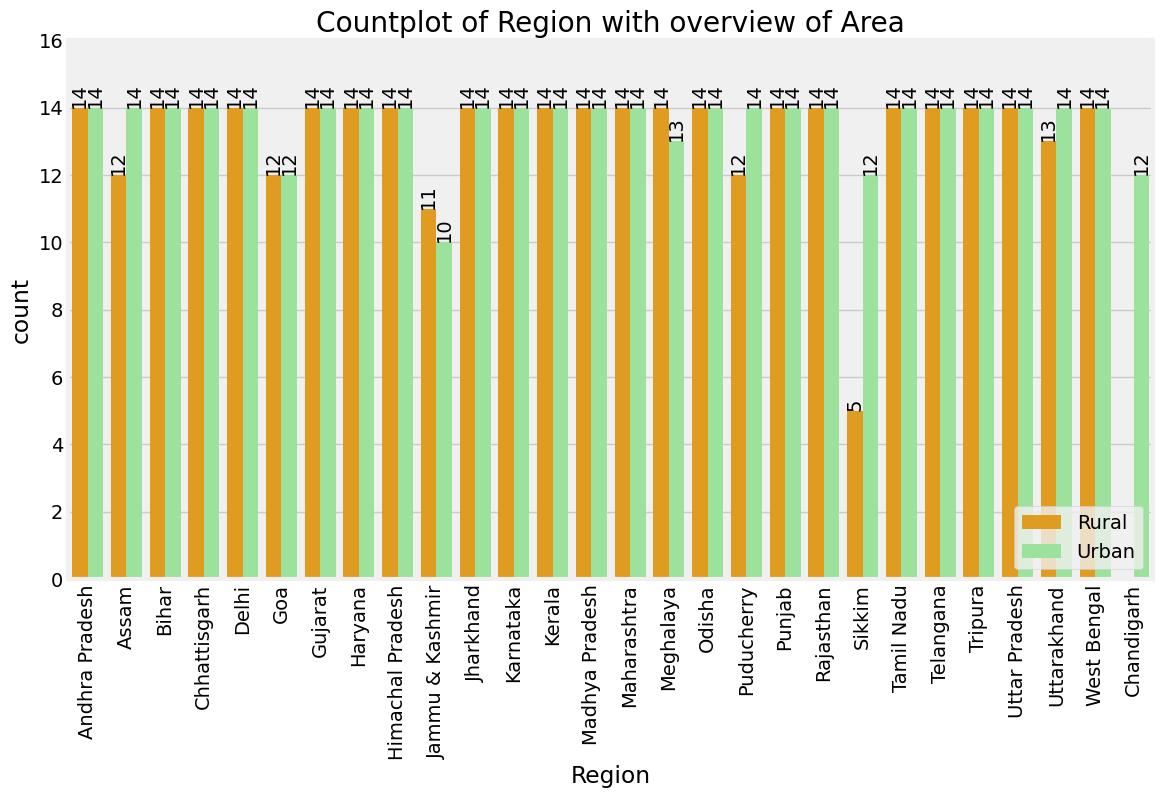

In [57]:
plt.figure(figsize=(14,7))
plt.style.use('fivethirtyeight')
ax = sns.countplot( x=df['Region'],hue = df['Area'], palette = ['orange','lightgreen'] )
plt.legend(loc = 'lower right')

for x in ax.containers:
        ax.bar_label(x,rotation=90)

plt.xticks(rotation=90)
plt.ylim(0,16)
plt.title('Countplot of Region with overview of Area')
plt.show()

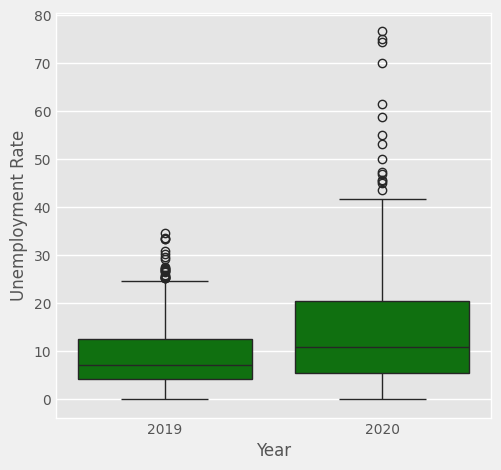

In [58]:
#Analysing the Unemployment Rate column
plt.figure(figsize=(5,5))
plt.style.use('ggplot')
sns.boxplot(y = df['Est_Unemp_Rate'], x = df['Year'], color ='green')
plt.ylabel('Unemployment Rate')
plt.show()

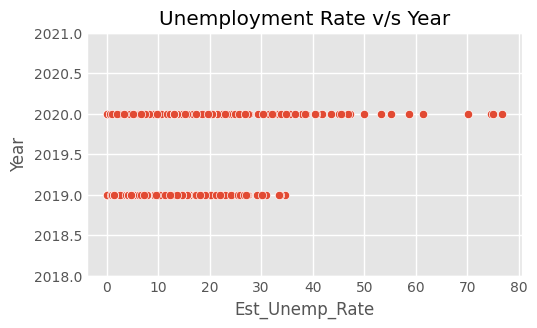

In [59]:
plt.figure(figsize=(5,3))
plt.style.use('ggplot')
sns.scatterplot(x = df['Est_Unemp_Rate'], y = df['Year'])
plt.ylim(2018,2021)
plt.title('Unemployment Rate v/s Year')
plt.show()

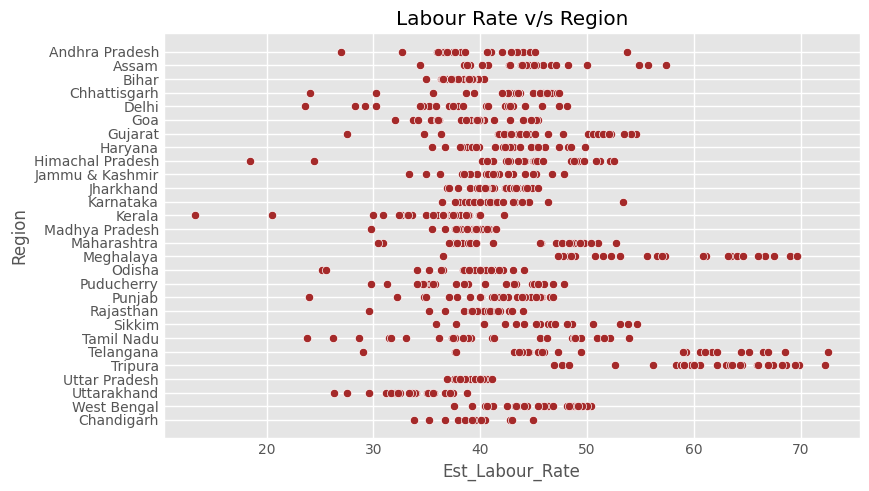

In [60]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.scatterplot(x = df['Est_Labour_Rate'], y = df['Region'], color = 'brown')
plt.title('Labour Rate v/s Region')
plt.show()

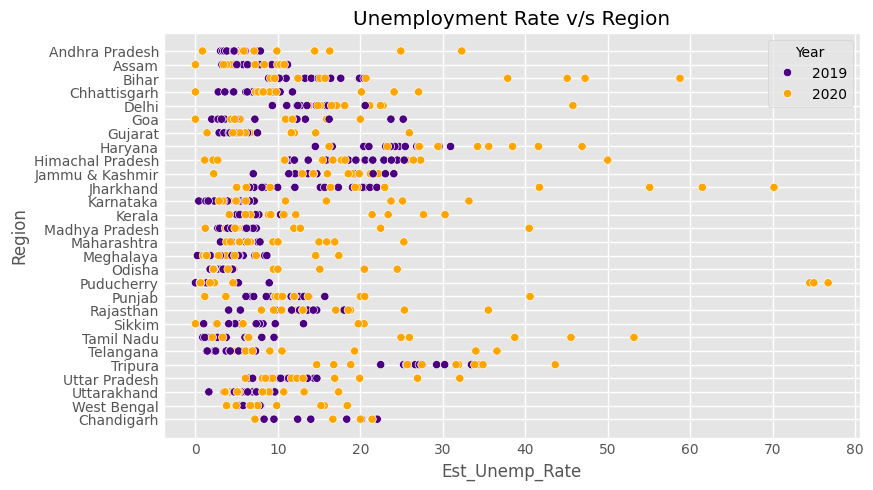

In [63]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.scatterplot(x = df['Est_Unemp_Rate'], y = df['Region'], hue = df['Year'], palette =['indigo','orange'])
plt.title('Unemployment Rate v/s Region')
plt.show()

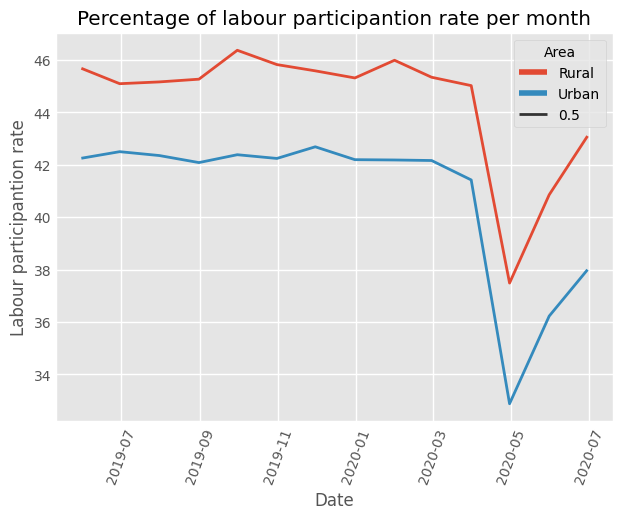

In [65]:
sns.lineplot(data=df, x='Date', y='Est_Labour_Rate', hue='Area', errorbar= None, size = 0.5)
plt.title('Percentage of labour participantion rate per month')
plt.ylabel('Labour participantion rate')
plt.xticks(rotation= 70)
plt.show()